In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [2]:
# Lectura de datos de enrtrada para el cálculo
s_parentpath=Path(r'C:\Alejo\ExtracciónDatos')
filepath=s_parentpath.joinpath(s_parentpath,'DatosConsumo.xlsx')

# Carga del nivel probabilístico del embalse
sheet_name='Consumo'
df_Esc=pd.read_excel(filepath, header=0,sheet_name=sheet_name)

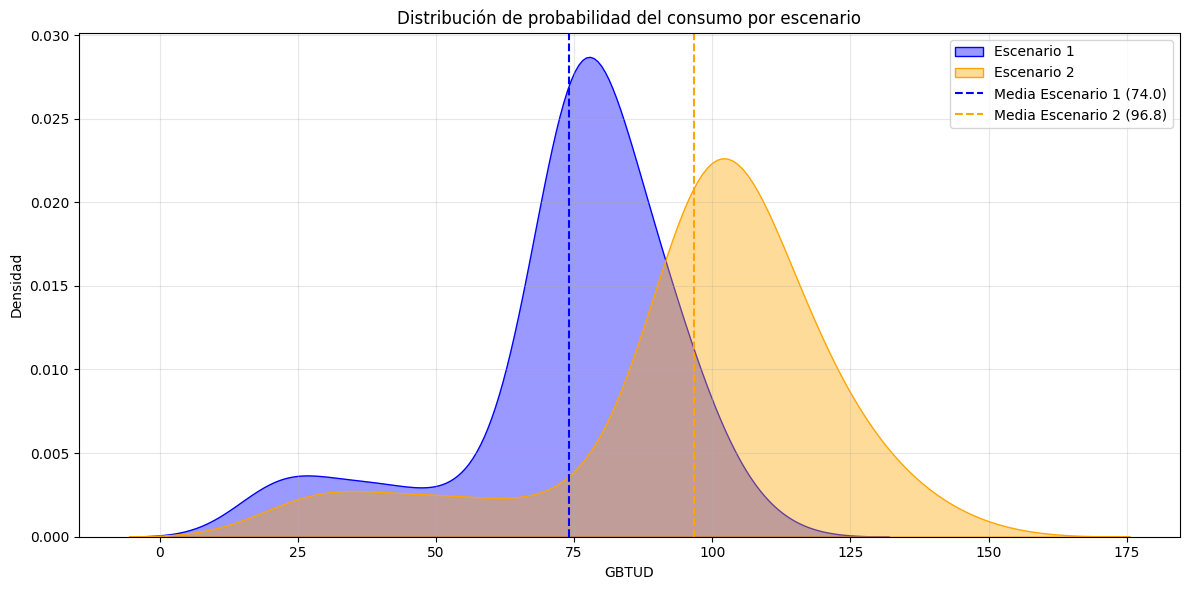

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que ya tienes df_Esc cargado con las columnas:
# 'Escenario 1' y 'Escenario 2'

CAPACIDAD = 284  # cambia esto si tu capacidad es otra

fig, ax = plt.subplots(figsize=(12, 6))

# ============================
# KDE por escenario
# ============================
sns.kdeplot(
    data=df_Esc['Escenario 1'],
    fill=True, alpha=0.4, color='blue',
    label='Escenario 1',
    ax=ax
)

sns.kdeplot(
    data=df_Esc['Escenario 2'],
    fill=True, alpha=0.4, color='orange',
    label='Escenario 2',
    ax=ax
)

# ============================
# Líneas verticales en la media
# ============================
mean_esc1 = df_Esc['Escenario 1'].mean()
mean_esc2 = df_Esc['Escenario 2'].mean()

ax.axvline(mean_esc1, color='blue', linestyle='--', linewidth=1.5,
           label=f'Media Escenario 1 ({mean_esc1:.1f})')
ax.axvline(mean_esc2, color='orange', linestyle='--', linewidth=1.5,
           label=f'Media Escenario 2 ({mean_esc2:.1f})')

# ============================
# Línea de capacidad
# ============================
# ax.axvline(CAPACIDAD, color='red', linestyle='-', linewidth=2,
#            label=f'Capacidad ({CAPACIDAD} GBTUD)')

# ============================
# Etiquetas y formato
# ============================
ax.set_title('Distribución de probabilidad del consumo por escenario')
ax.set_xlabel('GBTUD')
ax.set_ylabel('Densidad')
ax.grid(True, alpha=0.3)
ax.legend()

plt.tight_layout()
plt.show()
